<a href="https://colab.research.google.com/github/pbottleh/basic_data_analysis_titanic/blob/main/TitanicFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 기본 데이터 정리 및 처리
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

# 전처리 및 머신 러닝 알고리즘
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv
Saving test.csv to test (1).csv


In [ ]:
import io
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [ ]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Ward, Miss. Anna",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


train.info()

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train[3:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [ ]:
train.shape[0]

891

In [ ]:
ntrain = train.shape[0]
ntest = test.shape[0]

y_train = train['Survived']
#print(y_train)
y_train= train['Survived'].values
#print(y_train)

passid = test['PassengerId']

data = pd.concat((train,test))

print('data size is : {}'.format(data.shape))

data size is : (1309, 12)


In [ ]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

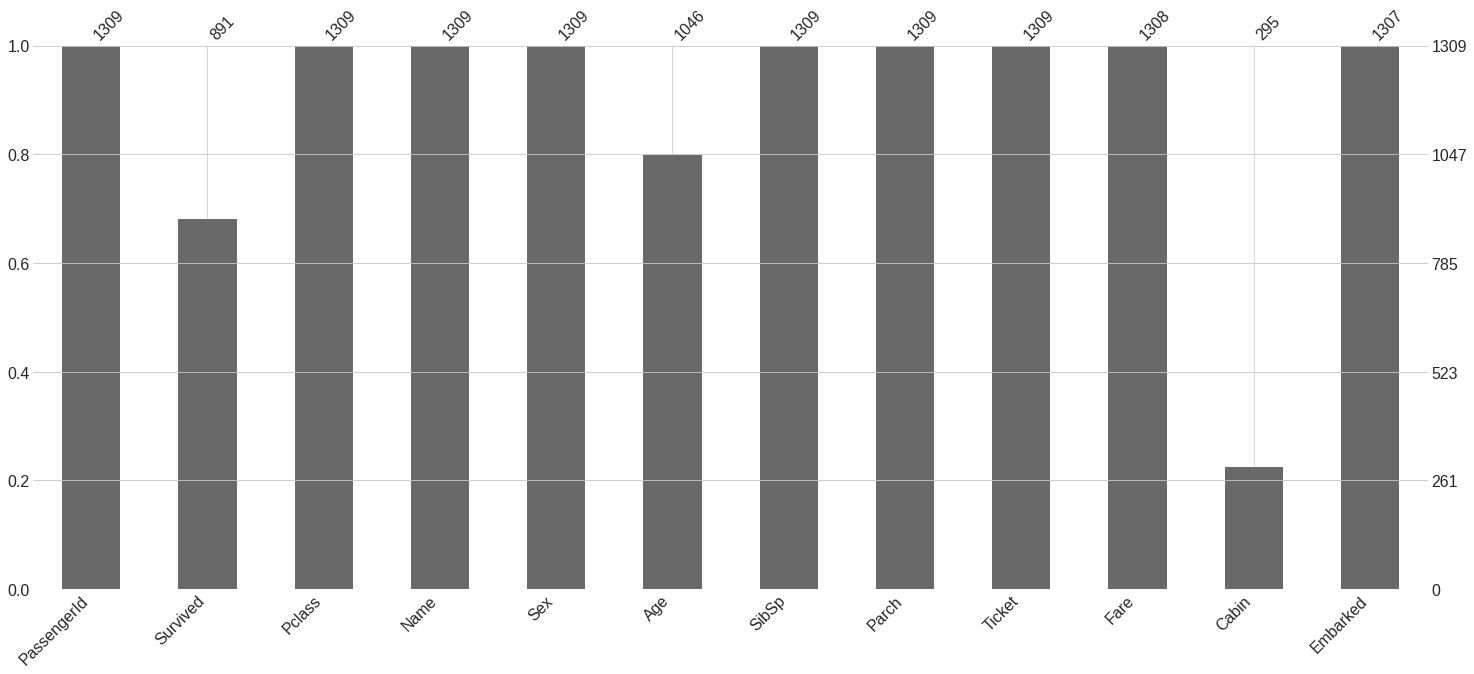

In [ ]:
missingno.bar(data)

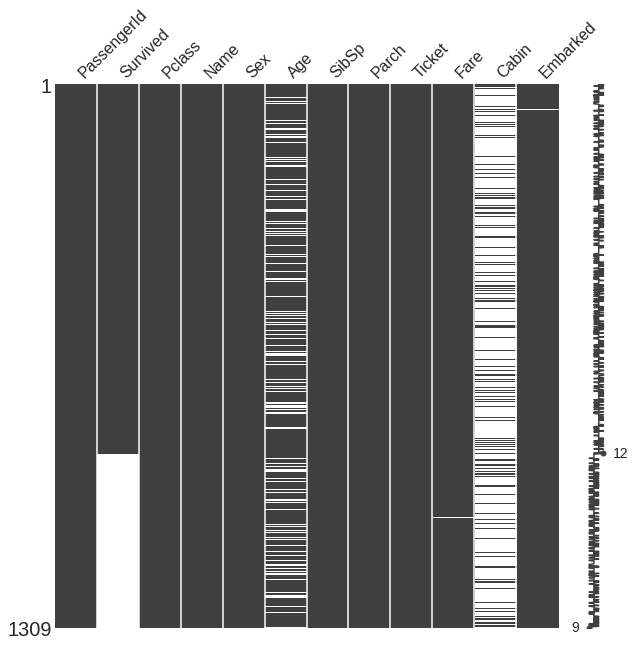

In [ ]:
#data = pd.concat((train,test),sort=True)
missingno.matrix(data, figsize=(10,10))

In [ ]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  , 22.5 ,
       18.5 , 67.  , 76.  , 26.5 , 60.5 , 11.5 ,  0.33,  0.17, 38.5 ])

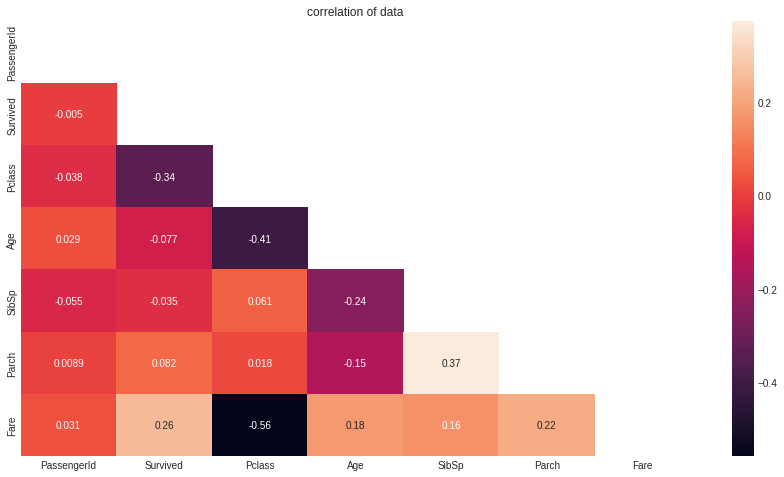

In [ ]:
corr = data.corr()

mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,8))
plt.title("correlation of data")
sns.heatmap(corr,mask=mask, annot=True)
plt.show()

0    549
1    342
Name: Survived, dtype: int64


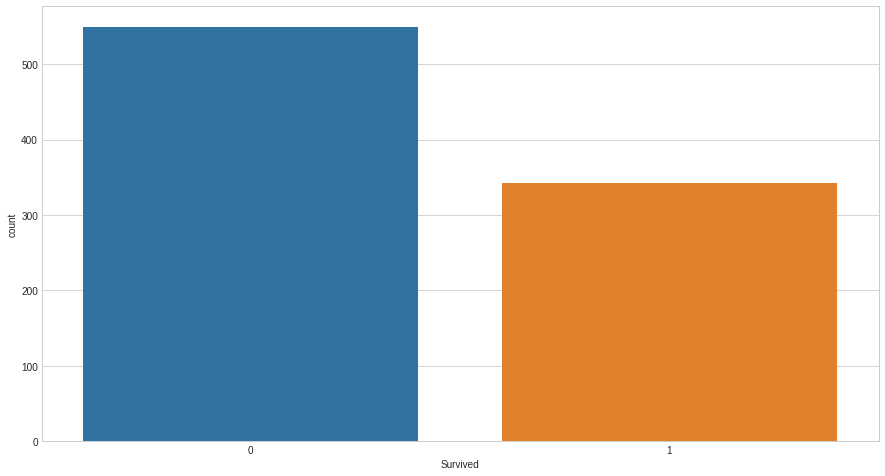

In [ ]:
fig = plt.figure(figsize=(15,8))
sns.countplot(data = train, x='Survived')
print(train.Survived.value_counts())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


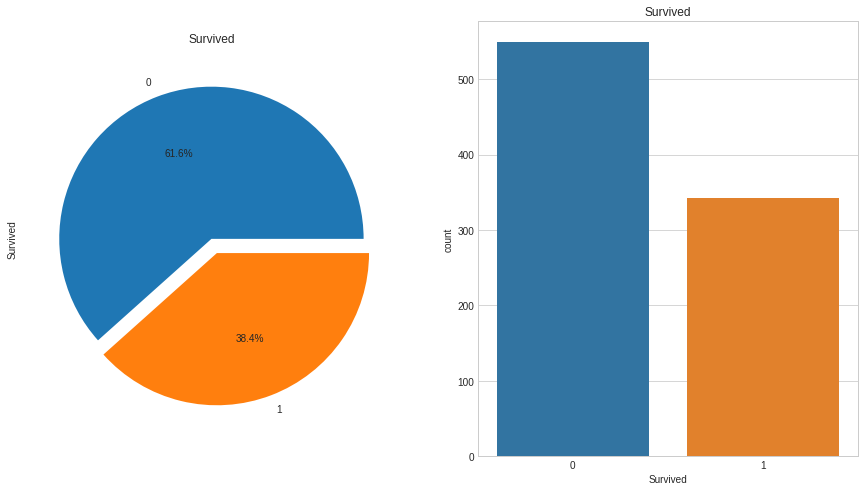

In [ ]:
f,ax = plt.subplots(1,2,figsize=(15,8))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Survived')

sns.countplot('Survived',data=train)
ax[1].set_title('Survived')

plt.show()

def pltpie(feature):
  f,ax = plt.subplots(1,2,figsize=(15,8))
  train[feature].value_counts().plot.pie(explode=[0.1 for i in range(train[feature].nunique())],autopct='%1.1f%%',ax=ax[0])
  ax[0].set_title(feature)

  sns.countplot(feature,data=train)
  ax[1].set_title(feature)
  plt.show()



pltpie('Pclass')

In [ ]:
train.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [ ]:
pd.crosstab(train.Pclass, train.Survived,margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


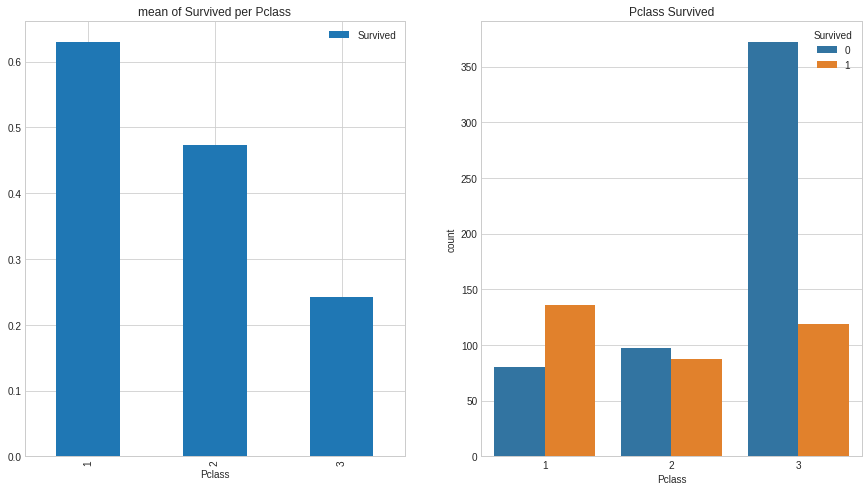

In [ ]:
f, ax = plt.subplots(1,2,figsize=(15,8))
train[['Pclass','Survived']].groupby('Pclass').mean().plot.bar(ax=ax[0])
ax[0].set_title('mean of Survived per Pclass')

sns.countplot(x='Pclass',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Pclass Survived')

plt.show()


In [ ]:
data.Name.value_counts()

Connolly, Miss. Kate                                   2
Kelly, Mr. James                                       2
Lindell, Mrs. Edvard Bengtsson (Elin Gerda Persson)    1
Larsson, Mr. Bengt Edvin                               1
Van der hoef, Mr. Wyckoff                              1
                                                      ..
Rogers, Mr. Reginald Harry                             1
Boulos, Mr. Hanna                                      1
Murphy, Miss. Nora                                     1
Drazenoic, Mr. Jozef                                   1
Canavan, Mr. Patrick                                   1
Name: Name, Length: 1307, dtype: int64

In [ ]:
temp = data.copy()
temp['Initial'] = 0
temp['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
temp.Initial.value_counts()
pd.crosstab(temp.Initial,temp.Sex,margins=True)


Sex,female,male,All
Initial,,,
Capt,0,1,1
Col,0,4,4
Countess,1,0,1
Don,0,1,1
Dona,1,0,1
Dr,1,7,8
Jonkheer,0,1,1
Lady,1,0,1
Major,0,2,2


In [ ]:
def survpct(feature):
  return temp.groupby(feature)['Survived'].mean()
survpct('Initial')

Initial
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dona             NaN
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

In [ ]:
survpct('Age')

Age
0.17     NaN
0.33     NaN
0.42     1.0
0.67     1.0
0.75     1.0
        ... 
70.50    0.0
71.00    0.0
74.00    0.0
76.00    NaN
80.00    1.0
Name: Survived, Length: 98, dtype: float64

In [ ]:
temp['LastName'] = data.Name.str.extract('([A-Za-z]+)')
temp.LastName

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
413      Spector
414        Oliva
415      Saether
416         Ware
417        Peter
Name: LastName, Length: 1309, dtype: object

In [ ]:
pd.crosstab(temp.LastName,temp.Survived)

Survived,0.0,1.0
LastName,,
Abbing,1,0
Abbott,1,1
Abelson,1,1
Adahl,1,0
Adams,1,0
...,...,...
Zabour,2,0
Zimmerman,1,0
de,1,2


In [ ]:
temp.loc[temp.Initial=='Dona']
temp.loc[temp.Initial=='Dona','Initial'] = 'Mrs'

pd.crosstab(temp.LastName,temp.Survived)



Survived,0.0,1.0
LastName,,
Abbing,1,0
Abbott,1,1
Abelson,1,1
Adahl,1,0
Adams,1,0
...,...,...
Zabour,2,0
Zimmerman,1,0
de,1,2


In [ ]:
temp['NumName'] = temp.LastName.factorize()[0]
##print(temp.LastName.factorize()[1])
temp



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,3
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,Spector,850
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Mrs,Oliva,851
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,Saether,852
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr,Ware,799


In [ ]:
train[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
train.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [ ]:
pd.crosstab(train.Sex,train.Survived,margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


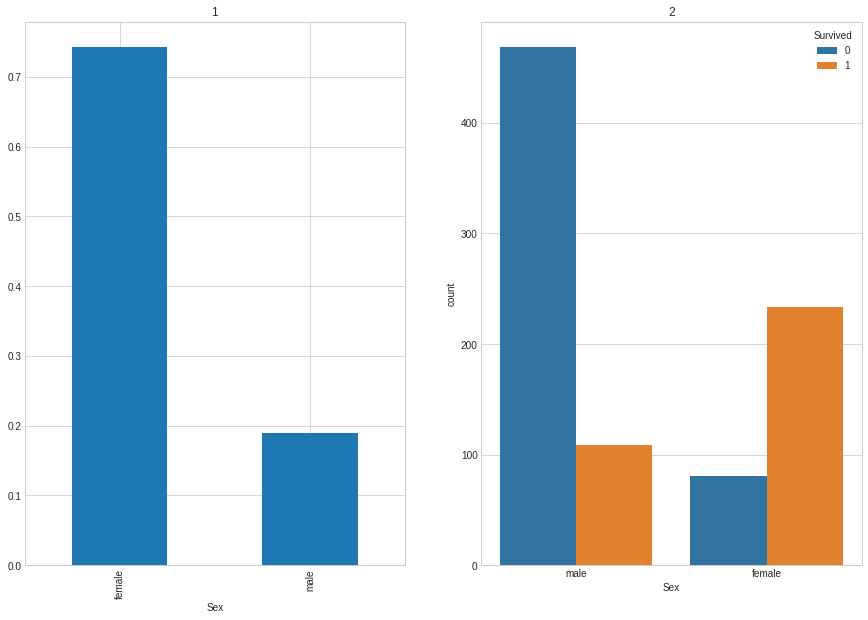

In [ ]:
def bag(col,target,title,title1):
  f,ax = plt.subplots(1,2,figsize=(15,10))
  train.groupby(col)[target].mean().plot(kind='bar',ax=ax[0])
  ax[0].set_title(title)
  sns.countplot(col,hue=target,data=train,ax=ax[1])
  ax[1].set_title(title1)
  plt.show()

bag('Sex','Survived','1','2')

In [ ]:
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

In [ ]:
train.groupby(['Pclass','Sex','Survived']).mean()

PassengerId        Age     SibSp     Parch        Fare
Pclass Sex    Survived                                                        
1      female 0          325.000000  25.666667  0.666667  1.333333  110.604167
              1          473.967033  34.939024  0.549451  0.428571  105.978159
       male   0          413.623377  44.581967  0.272727  0.259740   62.894910
              1          527.777778  36.248000  0.377778  0.311111   74.637320
2      female 0          423.500000  36.000000  0.500000  0.166667   18.250000
              1          444.785714  28.080882  0.485714  0.642857   22.288989
       male   0          454.010989  33.369048  0.307692  0.142857   19.488965
              1          415.588235  16.022000  0.529412  0.647059   21.095100
3      female 0          440.375000  23.818182  1.291667  1.097222   19.773093
              1          359.083333  19.329787  0.500000  0.500000   12.464526
       male   0          456.750000  27.255814  0.523333  0.213333   12.204469
              1          447.638298  22.274211  0.340426  0.297872   15.579696

In [ ]:
train.info()
##Age 빈칸 졸라 많음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print('the oldest person was {0} years'.format(data['Age'].max()))
print('the youngest person was {0} years'.format(data['Age'].min()))
print('the average age  {0} years'.format(data['Age'].mean()))


the oldest person was 80.0 years
the youngest person was 0.17 years
the average age  29.881137667304014 years


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


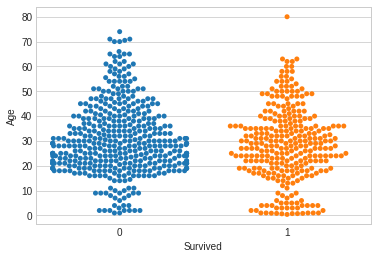

In [ ]:
sns.swarmplot(x=train.Survived, y=train.Age)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


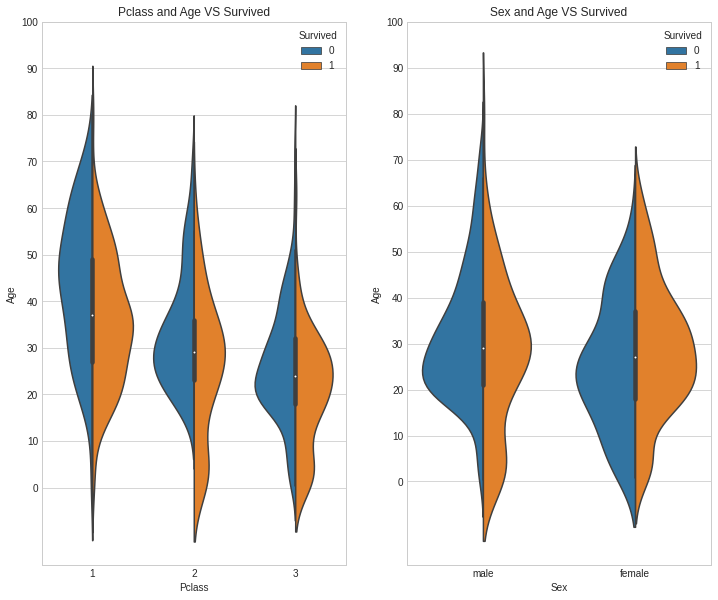

In [ ]:
f,ax = plt.subplots(1,2,figsize=(12,10))
sns.violinplot('Pclass','Age','Survived',data=train,ax=ax[0],split=True)
ax[0].set_title('Pclass and Age VS Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex','Age','Survived',data=train,ax=ax[1],split=True)
ax[1].set_title('Sex and Age VS Survived')
ax[1].set_yticks(range(0, 110, 10))

In [ ]:
temp.groupby('Initial').agg({'Age':['mean','count','max']})

Age            
               mean count   max
Initial                        
Capt      70.000000     1  70.0
Col       54.000000     4  60.0
Countess  33.000000     1  33.0
Don       40.000000     1  40.0
Dr        43.571429     7  54.0
Jonkheer  38.000000     1  38.0
Lady      48.000000     1  48.0
Major     48.500000     2  52.0
Master     5.482642    53  14.5
Miss      21.774238   210  63.0
Mlle      24.000000     2  24.0
Mme       24.000000     1  24.0
Mr        32.252151   581  80.0
Mrs       37.005848   171  76.0
Ms        28.000000     1  28.0
Rev       41.250000     8  57.0
Sir       49.000000     1  49.0

In [ ]:
temp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,3
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,Spector,850
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Mrs,Oliva,851
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,Saether,852
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr,Ware,799


In [ ]:
temp=temp.reset_index(drop=True)


temp['Age'] = temp.groupby('Initial')['Age'].apply(lambda x : x.fillna(x.mean()))
temp[31:50]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,37.005848,1,0,PC 17569,146.5208,B78,C,Mrs,Spencer,30
32,33,1.0,3,"Glynn, Miss. Mary Agatha",female,21.774238,0,0,335677,7.7500,NaN,Q,Miss,Glynn,31
33,34,0.0,2,"Wheadon, Mr. Edward H",male,66.000000,0,0,C.A. 24579,10.5000,NaN,S,Mr,Wheadon,32
34,35,0.0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,NaN,C,Mr,Meyer,33
35,36,0.0,1,"Holverson, Mr. Alexander Oskar",male,42.000000,1,0,113789,52.0000,NaN,S,Mr,Holverson,34
36,37,1.0,3,"Mamee, Mr. Hanna",male,32.252151,0,0,2677,7.2292,NaN,C,Mr,Mamee,35
37,38,0.0,3,"Cann, Mr. Ernest Charles",male,21.000000,0,0,A./5. 2152,8.0500,NaN,S,Mr,Cann,36
38,39,0.0,3,"Vander Planke, Miss. Augusta Maria",female,18.000000,2,0,345764,18.0000,NaN,S,Miss,Vander,18
39,40,1.0,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,NaN,C,Miss,Nicola,37
40,41,0.0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.000000,1,0,7546,9.4750,NaN,S,Mrs,Ahlin,38


In [ ]:
temp1=temp.copy()

temp1.Age2 = temp1.groupby('Initial')['Age'].fillna(temp1.groupby('Initial')['Age'].mean())
temp1[31:50]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,37.005848,1,0,PC 17569,146.5208,B78,C,Mrs,Spencer,30
32,33,1.0,3,"Glynn, Miss. Mary Agatha",female,21.774238,0,0,335677,7.7500,NaN,Q,Miss,Glynn,31
33,34,0.0,2,"Wheadon, Mr. Edward H",male,66.000000,0,0,C.A. 24579,10.5000,NaN,S,Mr,Wheadon,32
34,35,0.0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,NaN,C,Mr,Meyer,33
35,36,0.0,1,"Holverson, Mr. Alexander Oskar",male,42.000000,1,0,113789,52.0000,NaN,S,Mr,Holverson,34
36,37,1.0,3,"Mamee, Mr. Hanna",male,32.252151,0,0,2677,7.2292,NaN,C,Mr,Mamee,35
37,38,0.0,3,"Cann, Mr. Ernest Charles",male,21.000000,0,0,A./5. 2152,8.0500,NaN,S,Mr,Cann,36
38,39,0.0,3,"Vander Planke, Miss. Augusta Maria",female,18.000000,2,0,345764,18.0000,NaN,S,Miss,Vander,18
39,40,1.0,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,NaN,C,Miss,Nicola,37
40,41,0.0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.000000,1,0,7546,9.4750,NaN,S,Mrs,Ahlin,38


In [ ]:
temp['Initial'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dona' , 'Dr', 'Jonkheer',
                         'Lady', 'Major', 'Master', 'Miss'  ,'Mlle', 'Mme',
                         'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'],
                         ['Sacrificed', 'Respected', 'Nobles', 'Mr', 'Mrs', 'Respected',
                          'Mr', 'Nobles', 'Respected', 'Kids', 'Miss', 'Nobles', 'Nobles',
                          'Mr', 'Mrs', 'Nobles', 'Sacrificed', 'Nobles'],inplace=True)

temp['Initial'].replace(['Kids', 'Miss', 'Mr', 'Mrs', 
                         'Nobles', 'Respected', 'Sacrificed'],
                         [4, 4, 2, 5, 6, 3, 1], inplace=True)

In [ ]:
temp['Age_Range'] = pd.qcut(temp['Age'], 10)
temp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,2,Braund,0,"(21.0, 23.0]"
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,5,Cumings,1,"(33.0, 39.0]"
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,4,Heikkinen,2,"(23.0, 26.0]"
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,5,Futrelle,3,"(33.0, 39.0]"
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,2,Allen,4,"(33.0, 39.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,NaN,S,2,Spector,850,"(30.0, 32.252]"
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,5,Oliva,851,"(33.0, 39.0]"
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,2,Saether,852,"(33.0, 39.0]"
1307,1308,NaN,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,NaN,S,2,Ware,799,"(30.0, 32.252]"


In [ ]:
survpct('Age_Range')

Age_Range
(0.169, 16.0]     0.548077
(16.0, 21.0]      0.307692
(21.0, 23.0]      0.487179
(23.0, 26.0]      0.369863
(26.0, 30.0]      0.400000
(30.0, 32.252]    0.198718
(32.252, 33.0]    0.411765
(33.0, 39.0]      0.504762
(39.0, 48.0]      0.357143
(48.0, 80.0]      0.387500
Name: Survived, dtype: float64

In [ ]:
temp['Agroup']=0

temp.loc[temp['Age'] < 1.0, 'Agroup'] = 1
temp.loc[(temp['Age'] >=1.0) & (temp['Age'] <= 3.0), 'Agroup'] = 2
temp.loc[(temp['Age'] > 3.0) & (temp['Age'] < 11.0), 'Agroup'] = 7
temp.loc[(temp['Age'] >= 11.0) & (temp['Age'] < 15.0), 'Agroup'] = 13
temp.loc[(temp['Age'] >= 15.0) & (temp['Age'] < 18.0), 'Agroup'] = 16
temp.loc[(temp['Age'] >= 18.0) & (temp['Age'] <=  20.0), 'Agroup'] = 18
temp.loc[(temp['Age'] > 20.0) & (temp['Age'] <= 22.0), 'Agroup'] = 21
temp.loc[(temp['Age'] > 22.0) & (temp['Age'] <= 26.0), 'Agroup'] = 24
temp.loc[(temp['Age'] > 26.0) & (temp['Age'] <= 30.0), 'Agroup'] = 28
temp.loc[(temp['Age'] > 30.0) & (temp['Age'] <= 32.0), 'Agroup'] = 31
temp.loc[(temp['Age'] > 32.0) & (temp['Age'] <= 34.0), 'Agroup'] = 33
temp.loc[(temp['Age'] > 34.0) & (temp['Age'] <= 38.0), 'Agroup'] = 36
temp.loc[(temp['Age'] > 38.0) & (temp['Age'] <= 52.0), 'Agroup'] = 45
temp.loc[(temp['Age'] > 52.0) & (temp['Age'] <= 75.0), 'Agroup'] = 60
temp.loc[temp['Age'] > 75.0, 'Agroup'] = 78

temp[101:130]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup
101,102,0.0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,32.252151,0,0,349215,7.8958,NaN,S,2,Petroff,95,"(30.0, 32.252]",33
102,103,0.0,1,"White, Mr. Richard Frasar",male,21.000000,0,1,35281,77.2875,D26,S,2,White,96,"(16.0, 21.0]",21
103,104,0.0,3,"Johansson, Mr. Gustaf Joel",male,33.000000,0,0,7540,8.6542,NaN,S,2,Johansson,97,"(32.252, 33.0]",33
104,105,0.0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.000000,2,0,3101276,7.9250,NaN,S,2,Gustafsson,98,"(33.0, 39.0]",36
105,106,0.0,3,"Mionoff, Mr. Stoytcho",male,28.000000,0,0,349207,7.8958,NaN,S,2,Mionoff,99,"(26.0, 30.0]",28
106,107,1.0,3,"Salkjelsvik, Miss. Anna Kristine",female,21.000000,0,0,343120,7.6500,NaN,S,4,Salkjelsvik,100,"(16.0, 21.0]",21
107,108,1.0,3,"Moss, Mr. Albert Johan",male,32.252151,0,0,312991,7.7750,NaN,S,2,Moss,101,"(30.0, 32.252]",33
108,109,0.0,3,"Rekic, Mr. Tido",male,38.000000,0,0,349249,7.8958,NaN,S,2,Rekic,102,"(33.0, 39.0]",36
109,110,1.0,3,"Moran, Miss. Bertha",female,21.774238,1,0,371110,24.1500,NaN,Q,4,Moran,5,"(21.0, 23.0]",21
110,111,0.0,1,"Porter, Mr. Walter Chamberlain",male,47.000000,0,0,110465,52.0000,C110,S,2,Porter,103,"(39.0, 48.0]",45


In [ ]:
temp.loc[temp['Sex']=='male','Sex']=1
temp.loc[(temp['Sex'] == 'female'), 'Sex'] = 2
temp.loc[(temp['Age'] < 1), 'Sex'] = 3

In [ ]:
survpct('Sex')

Sex
1    0.181818
2    0.740385
3    1.000000
Name: Survived, dtype: float64

In [ ]:
temp['Alone']=0
temp.Family = 0

temp.loc[(temp['SibSp']==0) & (temp['Parch']==0),'Alone']=1
temp['Family'] = temp.SibSp + temp.Parch+1

temp.head(n=10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,2,Braund,0,"(21.0, 23.0]",21,0,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.000000,1,0,PC 17599,71.2833,C85,C,5,Cumings,1,"(33.0, 39.0]",36,0,2
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,4,Heikkinen,2,"(23.0, 26.0]",24,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.000000,1,0,113803,53.1000,C123,S,5,Futrelle,3,"(33.0, 39.0]",36,0,2
4,5,0.0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,2,Allen,4,"(33.0, 39.0]",36,1,1
5,6,0.0,3,"Moran, Mr. James",1,32.252151,0,0,330877,8.4583,NaN,Q,2,Moran,5,"(30.0, 32.252]",33,1,1
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S,2,McCarthy,6,"(48.0, 80.0]",60,1,1
7,8,0.0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S,4,Palsson,7,"(0.169, 16.0]",2,0,5
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,27.000000,0,2,347742,11.1333,NaN,S,5,Johnson,8,"(26.0, 30.0]",28,0,3
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",2,14.000000,1,0,237736,30.0708,NaN,C,5,Nasser,9,"(0.169, 16.0]",13,0,2


In [ ]:
survpct('Family')

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


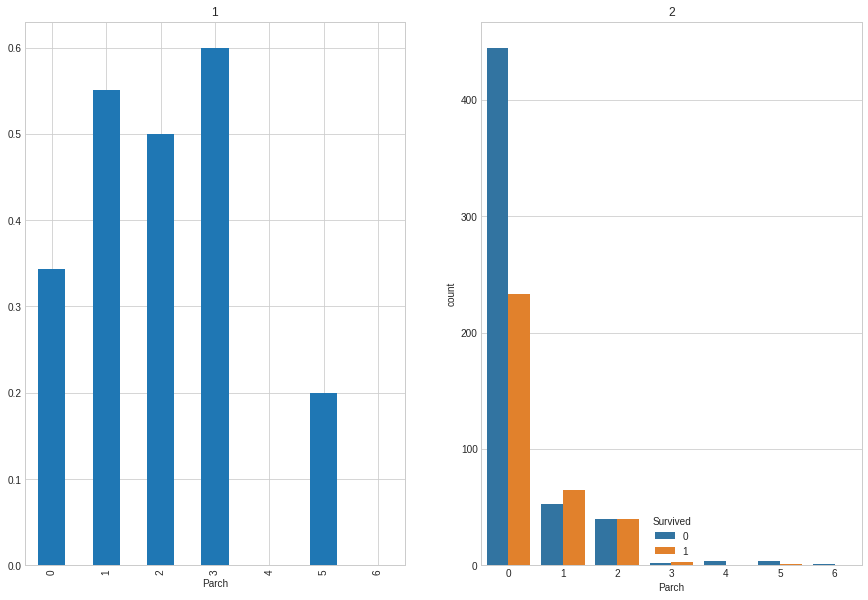

In [ ]:
bag('Parch',"Survived",'1','2')

In [ ]:
pd.crosstab([temp['Family'],temp.Survived],temp.Pclass,margins=True)

Pclass             1    2    3  All
Family Survived                    
1      0.0        51   68  255  374
       1.0        58   36   69  163
2      0.0        19   16   37   72
       1.0        51   18   20   89
3      0.0         6   10   27   43
       1.0        18   21   20   59
4      0.0         2    3    3    8
       1.0         5   10    6   21
5      0.0         0    0   12   12
       1.0         2    1    0    3
6      0.0         2    0   17   19
       1.0         2    1    0    3
7      0.0         0    0    8    8
       1.0         0    0    4    4
8      0.0         0    0    6    6
11     0.0         0    0    7    7
All              216  184  491  891

In [ ]:
temp.Ticket.isnull().sum()
temp.Ticket.head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [ ]:
temp['Inticket']=0
temp.Inticket = temp.Ticket.str.extract('^([A-Za-z0-9]+)')
temp.Inticket.head(10)

0         A
1        PC
2      STON
3    113803
4    373450
5    330877
6     17463
7    349909
8    347742
9    237736
Name: Inticket, dtype: object

In [ ]:
temp['Inticket'] = temp.Ticket.str.extract('^([A-Za-z]+)')
temp.Inticket.head(10)

0       A
1      PC
2    STON
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
Name: Inticket, dtype: object

In [ ]:
temp['NumTicket'] = temp['Inticket'].factorize()[0]
temp.NumTicket.value_counts()

-1     957
 1      92
 4      55
 0      40
 10     27
 5      25
 2      22
 7      22
 6      21
 9      17
 13     12
 12      4
 3       4
 18      2
 17      2
 16      2
 15      1
 19      1
 11      1
 14      1
 8       1
Name: NumTicket, dtype: int64

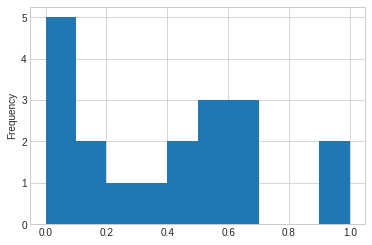

In [ ]:
temp.groupby('NumTicket')['Survived'].mean().plot(kind='hist')

In [ ]:
temp['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

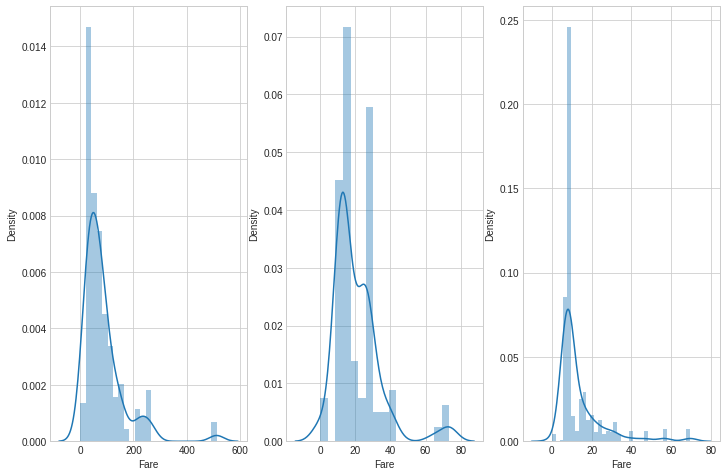

In [ ]:
f, ax = plt.subplots(1,3,figsize=(12,8))
sns.distplot(train[train['Pclass']==1].Fare,ax=ax[0])
sns.distplot(train[train['Pclass']==2].Fare,ax=ax[1])
sns.distplot(train[train['Pclass']==3].Fare,ax=ax[2])

In [ ]:
def groupmean(a,b):
  return temp.groupby(a)[b].mean()

temp['Fare_Range'] = pd.qcut(train['Fare'],10)
groupmean('Fare_Range','Fare')

Fare_Range
(-0.001, 7.55]         5.928717
(7.55, 7.854]          7.768490
(7.854, 8.05]          7.963669
(8.05, 10.5]           9.521367
(10.5, 14.454]        12.940231
(14.454, 21.679]      17.386408
(21.679, 27.0]        25.487501
(27.0, 39.688]        32.282186
(39.688, 77.958]      59.444572
(77.958, 512.329]    146.807086
Name: Fare, dtype: float64

In [ ]:
temp['Fgroup'] = 0

temp.loc[temp['Fare'] <= 0,'Fgroup'] = 0
temp.loc[(temp['Fare'] > 0) & (temp['Fare'] <= 7.125), 'Fgroup'] = 1
temp.loc[(temp['Fare'] > 7.125) & (temp['Fare'] <= 7.9), 'Fgroup'] = 2
temp.loc[(temp['Fare'] > 7.9) & (temp['Fare'] <= 8.03), 'Fgroup'] = 3
temp.loc[(temp['Fare'] > 8.03) & (temp['Fare'] < 10.5), 'Fgroup'] = 4
temp.loc[(temp['Fare'] >= 10.5) & (temp['Fare'] < 23.0), 'Fgroup'] = 5
temp.loc[(temp['Fare'] >= 23.0) & (temp['Fare'] <= 27.8), 'Fgroup'] = 6
temp.loc[(temp['Fare'] > 27.8) & (temp['Fare'] <= 51.0), 'Fgroup'] = 7
temp.loc[(temp['Fare'] > 51.0) & (temp['Fare'] <= 73.5), 'Fgroup'] = 8
temp.loc[temp['Fare'] > 73.5, 'Fgroup'] = 9

In [ ]:
temp.Cabin.value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F4                 4
D                  4
                  ..
B39                1
B42                1
E60                1
E40                1
D7                 1
Name: Cabin, Length: 186, dtype: int64

In [ ]:
temp.Cabin.isnull().sum()

1014

In [ ]:
temp['Inicab'] = 0
temp['Inicab'] = temp['Cabin'].str.extract('^([A-Za-z]+)')
temp.loc[(temp['Pclass']==1) & (temp['Cabin'].isnull()),'Inicab']='X'
temp.loc[(temp['Pclass']==2) & (temp['Cabin'].isnull()),'Inicab']='Y'
temp.loc[(temp['Pclass']==3) & (temp['Cabin'].isnull()),'Inicab']='Z'


In [ ]:
temp.Inicab = temp.Inicab.factorize()[0]

temp[11:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Inticket,NumTicket,Fare_Range,Fgroup,Inicab
11,12,1.0,1,"Bonnell, Miss. Elizabeth",2,58.000000,0,0,113783,26.5500,C103,S,4,Bonnell,11,"(48.0, 80.0]",60,1,1,NaN,-1,"(21.679, 27.0]",6,1
12,13,0.0,3,"Saundercock, Mr. William Henry",1,20.000000,0,0,A/5. 2151,8.0500,NaN,S,2,Saundercock,12,"(16.0, 21.0]",18,1,1,A,0,"(7.854, 8.05]",4,0
13,14,0.0,3,"Andersson, Mr. Anders Johan",1,39.000000,1,5,347082,31.2750,NaN,S,2,Andersson,13,"(33.0, 39.0]",45,0,7,NaN,-1,"(27.0, 39.688]",7,0
14,15,0.0,3,"Vestrom, Miss. Hulda Amanda Adolfina",2,14.000000,0,0,350406,7.8542,NaN,S,4,Vestrom,14,"(0.169, 16.0]",13,1,1,NaN,-1,"(7.55, 7.854]",2,0
15,16,1.0,2,"Hewlett, Mrs. (Mary D Kingcome)",2,55.000000,0,0,248706,16.0000,NaN,S,5,Hewlett,15,"(48.0, 80.0]",60,1,1,NaN,-1,"(14.454, 21.679]",5,3
16,17,0.0,3,"Rice, Master. Eugene",1,2.000000,4,1,382652,29.1250,NaN,Q,4,Rice,16,"(0.169, 16.0]",2,0,6,NaN,-1,"(27.0, 39.688]",7,0
17,18,1.0,2,"Williams, Mr. Charles Eugene",1,32.252151,0,0,244373,13.0000,NaN,S,2,Williams,17,"(30.0, 32.252]",33,1,1,NaN,-1,"(10.5, 14.454]",5,3
18,19,0.0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",2,31.000000,1,0,345763,18.0000,NaN,S,5,Vander,18,"(30.0, 32.252]",31,0,2,NaN,-1,"(14.454, 21.679]",5,0
19,20,1.0,3,"Masselmani, Mrs. Fatima",2,37.005848,0,0,2649,7.2250,NaN,C,5,Masselmani,19,"(33.0, 39.0]",36,1,1,NaN,-1,"(-0.001, 7.55]",2,0


In [ ]:
pd.crosstab(temp.Embarked,temp.Pclass,margins=True)

Pclass,1,2,3,All
Embarked,,,,
C,141,28,101,270
Q,3,7,113,123
S,177,242,495,914
All,321,277,709,1307


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


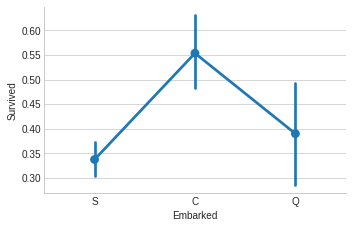

In [ ]:
sns.factorplot('Embarked','Survived',data=temp)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

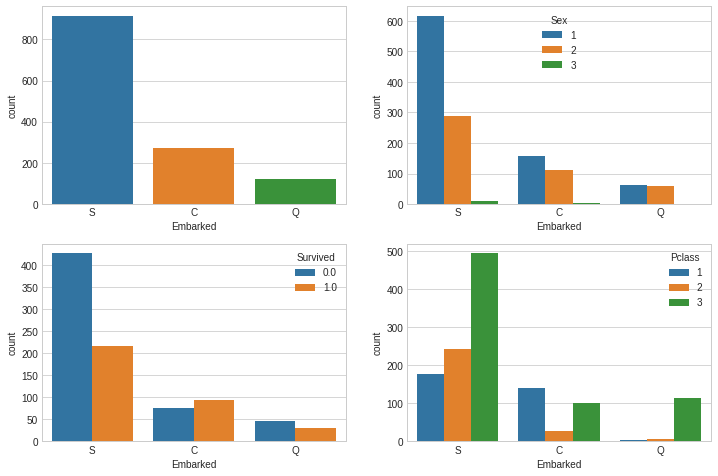

In [ ]:
f, ax = plt.subplots(2,2,figsize=(12,8))
sns.countplot('Embarked',data=temp,ax=ax[0,0])
sns.countplot('Embarked',hue='Sex',data=temp,ax=ax[0,1])
sns.countplot('Embarked',hue='Survived',data=temp, ax=ax[1,0])
sns.countplot('Embarked',hue='Pclass',data=temp,ax=ax[1,1])

plt.show()

In [ ]:
temp.loc[temp.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Inticket,NumTicket,Fare_Range,Fgroup,Inicab
61,62,1.0,1,"Icard, Miss. Amelie",2,38.0,0,0,113572,80.0,B28,NaN,4,Icard,58,"(33.0, 39.0]",36,1,1,NaN,-1,"(77.958, 512.329]",9,8
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",2,62.0,0,0,113572,80.0,B28,NaN,5,Stone,616,"(48.0, 80.0]",60,1,1,NaN,-1,"(77.958, 512.329]",9,8


In [ ]:
temp.loc[temp.Ticket=='113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Inticket,NumTicket,Fare_Range,Fgroup,Inicab
61,62,1.0,1,"Icard, Miss. Amelie",2,38.0,0,0,113572,80.0,B28,NaN,4,Icard,58,"(33.0, 39.0]",36,1,1,NaN,-1,"(77.958, 512.329]",9,8
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",2,62.0,0,0,113572,80.0,B28,NaN,5,Stone,616,"(48.0, 80.0]",60,1,1,NaN,-1,"(77.958, 512.329]",9,8


In [ ]:
temp.sort_values('Ticket',ascending = True)[55:70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Inticket,NumTicket,Fare_Range,Fgroup,Inicab
54,55,0.0,1,"Ostby, Mr. Engelhart Cornelius",1,65.000000,0,1,113509,61.9792,B30,C,2,Ostby,51,"(48.0, 80.0]",60,0,2,NaN,-1,"(39.688, 77.958]",8,8
351,352,0.0,1,"Williams-Lambert, Mr. Fletcher Fellows",1,32.252151,0,0,113510,35.0000,C128,S,2,Williams,17,"(30.0, 32.252]",33,1,1,NaN,-1,"(27.0, 39.688]",7,1
252,253,0.0,1,"Stead, Mr. William Thomas",1,62.000000,0,0,113514,26.5500,C87,S,2,Stead,217,"(48.0, 80.0]",60,1,1,NaN,-1,"(21.679, 27.0]",6,1
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",2,62.000000,0,0,113572,80.0000,B28,NaN,5,Stone,616,"(48.0, 80.0]",60,1,1,NaN,-1,"(77.958, 512.329]",9,8
61,62,1.0,1,"Icard, Miss. Amelie",2,38.000000,0,0,113572,80.0000,B28,NaN,4,Icard,58,"(33.0, 39.0]",36,1,1,NaN,-1,"(77.958, 512.329]",9,8
802,803,1.0,1,"Carter, Master. William Thornton II",1,11.000000,1,2,113760,120.0000,B96 B98,S,4,Carter,215,"(0.169, 16.0]",13,0,4,NaN,-1,"(77.958, 512.329]",9,8
390,391,1.0,1,"Carter, Mr. William Ernest",1,36.000000,1,2,113760,120.0000,B96 B98,S,2,Carter,215,"(33.0, 39.0]",36,0,4,NaN,-1,"(77.958, 512.329]",9,8
435,436,1.0,1,"Carter, Miss. Lucile Polk",2,14.000000,1,2,113760,120.0000,B96 B98,S,4,Carter,215,"(0.169, 16.0]",13,0,4,NaN,-1,"(77.958, 512.329]",9,8
763,764,1.0,1,"Carter, Mrs. William Ernest (Lucile Polk)",2,36.000000,1,2,113760,120.0000,B96 B98,S,5,Carter,215,"(33.0, 39.0]",36,0,4,NaN,-1,"(77.958, 512.329]",9,8
185,186,0.0,1,"Rood, Mr. Hugh Roscoe",1,32.252151,0,0,113767,50.0000,A32,S,2,Rood,162,"(30.0, 32.252]",33,1,1,NaN,-1,"(39.688, 77.958]",7,6


In [ ]:

temp['Embarked'] = temp.Embarked.fillna('S')

temp.loc[temp.Ticket=='113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Inticket,NumTicket,Fare_Range,Fgroup,Inicab
61,62,1.0,1,"Icard, Miss. Amelie",2,38.0,0,0,113572,80.0,B28,S,4,Icard,58,"(33.0, 39.0]",36,1,1,NaN,-1,"(77.958, 512.329]",9,8
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",2,62.0,0,0,113572,80.0,B28,S,5,Stone,616,"(48.0, 80.0]",60,1,1,NaN,-1,"(77.958, 512.329]",9,8


In [ ]:
temp.Embarked = temp.Embarked.factorize()[0]

temp[11:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Inticket,NumTicket,Fare_Range,Fgroup,Inicab
11,12,1.0,1,"Bonnell, Miss. Elizabeth",2,58.000000,0,0,113783,26.5500,C103,0,4,Bonnell,11,"(48.0, 80.0]",60,1,1,NaN,-1,"(21.679, 27.0]",6,1
12,13,0.0,3,"Saundercock, Mr. William Henry",1,20.000000,0,0,A/5. 2151,8.0500,NaN,0,2,Saundercock,12,"(16.0, 21.0]",18,1,1,A,0,"(7.854, 8.05]",4,0
13,14,0.0,3,"Andersson, Mr. Anders Johan",1,39.000000,1,5,347082,31.2750,NaN,0,2,Andersson,13,"(33.0, 39.0]",45,0,7,NaN,-1,"(27.0, 39.688]",7,0
14,15,0.0,3,"Vestrom, Miss. Hulda Amanda Adolfina",2,14.000000,0,0,350406,7.8542,NaN,0,4,Vestrom,14,"(0.169, 16.0]",13,1,1,NaN,-1,"(7.55, 7.854]",2,0
15,16,1.0,2,"Hewlett, Mrs. (Mary D Kingcome)",2,55.000000,0,0,248706,16.0000,NaN,0,5,Hewlett,15,"(48.0, 80.0]",60,1,1,NaN,-1,"(14.454, 21.679]",5,3
16,17,0.0,3,"Rice, Master. Eugene",1,2.000000,4,1,382652,29.1250,NaN,2,4,Rice,16,"(0.169, 16.0]",2,0,6,NaN,-1,"(27.0, 39.688]",7,0
17,18,1.0,2,"Williams, Mr. Charles Eugene",1,32.252151,0,0,244373,13.0000,NaN,0,2,Williams,17,"(30.0, 32.252]",33,1,1,NaN,-1,"(10.5, 14.454]",5,3
18,19,0.0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",2,31.000000,1,0,345763,18.0000,NaN,0,5,Vander,18,"(30.0, 32.252]",31,0,2,NaN,-1,"(14.454, 21.679]",5,0
19,20,1.0,3,"Masselmani, Mrs. Fatima",2,37.005848,0,0,2649,7.2250,NaN,1,5,Masselmani,19,"(33.0, 39.0]",36,1,1,NaN,-1,"(-0.001, 7.55]",2,0


In [ ]:
print(survpct('Initial'))
print(survpct('Pclass'))
print(survpct('Sex'))
print(survpct('Age').head())
print(survpct('Fgroup'))


Initial
1    0.000000
2    0.156069
3    0.454545
4    0.675676
5    0.792000
6    1.000000
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Sex
1    0.181818
2    0.740385
3    1.000000
Name: Survived, dtype: float64
Age
0.17    NaN
0.33    NaN
0.42    1.0
0.67    1.0
0.75    1.0
Name: Survived, dtype: float64
Fgroup
0    0.066667
1    0.037037
2    0.232044
3    0.473684
4    0.144330
5    0.425000
6    0.489362
7    0.353535
8    0.564516
9    0.762887
Name: Survived, dtype: float64


In [ ]:
temp['Priority'] = 0

temp.loc[(temp['Initial'] == 6), 'Priority'] = 1
temp.loc[(temp['Pclass'] == 1) & (temp['Sex'] == 2), 'Priority'] = 2
temp.loc[(temp['Age'] < 1), 'Priority'] = 3
temp.loc[(temp['Pclass'] == 1) & (temp['Age'] <= 17), 'Priority'] = 4
temp.loc[(temp['Pclass'] == 2) & (temp['Age'] <= 17), 'Priority'] = 5
temp.loc[(temp['Pclass'] == 2) & (temp['Sex'] == 2), 'Priority'] = 6
temp.loc[(temp['Fgroup'] == 9), 'Priority'] = 7

survpct('Priority')

Priority
0    0.229508
1    1.000000
2    0.965517
3    1.000000
4    1.000000
5    0.818182
6    0.921053
7    0.762887
Name: Survived, dtype: float64

In [ ]:
temp['Priority'].value_counts()

0    978
7    145
6    105
2     52
5     16
3      7
4      4
1      2
Name: Priority, dtype: int64

In [ ]:
print(survpct('Family'))
print(survpct('Fgroup'))

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64
Fgroup
0    0.066667
1    0.037037
2    0.232044
3    0.473684
4    0.144330
5    0.425000
6    0.489362
7    0.353535
8    0.564516
9    0.762887
Name: Survived, dtype: float64


In [ ]:
temp['FH'] = 0
temp.loc[(temp['Sex'] == 1), 'FH'] = 0
temp.loc[(temp['Sex'] == 2), 'FH'] = 1
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 2), 'FH'] = 2
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 3), 'FH'] = 3
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 4), 'FH'] = 4
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 1), 'FH'] = 5
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 2), 'FH'] = 6
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] == 3), 'FH'] = 7
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] >= 5), 'FH'] = 8

print(survpct('FH'))
print(temp.FH.value_counts())

FH
0    0.191710
1    0.615385
2    0.333333
3    0.000000
7    0.666667
8    0.784553
Name: Survived, dtype: float64
0    847
8    354
1     89
7      8
2      7
3      4
Name: FH, dtype: int64


In [ ]:
temp['MH'] = 0
temp.loc[(temp['Sex'] == 2), 'MH'] = 0
temp.loc[(temp['Sex'] == 1), 'MH'] = 1
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 2), 'MH'] = 2
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 3), 'MH'] = 3
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 4), 'MH'] = 4
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 1), 'MH'] = 5
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 2), 'MH'] = 6
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] == 3), 'MH'] = 7
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] >= 5), 'MH'] = 8

print(survpct('MH'))
print(temp.MH.value_counts())

MH
0    0.746082
1    0.094017
2    0.111111
3    0.000000
5    0.000000
6    0.000000
7    0.384615
8    0.253333
Name: Survived, dtype: float64
0    474
8    450
1    335
7     16
2     13
5      8
6      7
3      6
Name: MH, dtype: int64


In [ ]:
temp['FL'] = 0
temp.loc[(temp['Sex'] == 1), 'FL'] = 0
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] < 5), 'FL'] = 1
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] != 3), 'FL'] = 2
temp.loc[(temp['Sex'] == 2) & (temp['FH'] == 1), 'FL'] = 3
temp.loc[(temp['Sex'] == 2) & (temp['Family'] < 2), 'FL'] = 4
temp.loc[(temp['Sex'] == 2) & (temp['Family'] > 4), 'FL'] = 5
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 3), 'FL'] = 6

print(survpct('FL'))
print(temp.FL.value_counts())

FL
0    0.191710
1    0.000000
2    0.809211
4    0.939394
5    0.272727
6    0.616667
Name: Survived, dtype: float64
0    847
2    225
6    100
4     94
5     41
1      2
Name: FL, dtype: int64


In [ ]:
temp['ML'] = 0
temp.loc[(temp['Sex'] == 2), 'ML'] = 0
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] < 5), 'ML'] = 1
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] != 3), 'ML'] = 2
temp.loc[(temp['Sex'] == 1) & (temp['MH'] <7), 'ML'] = 3
temp.loc[(temp['Sex'] == 1) & (temp['Family'] < 2), 'ML'] = 4
temp.loc[(temp['Sex'] == 1) & (temp['Family'] > 4), 'ML'] = 5
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 3), 'ML'] = 6

print(survpct('ML'))
print(temp.ML.value_counts())

ML
0    0.746082
1    0.333333
2    0.318966
3    0.076923
4    0.217687
5    0.034483
6    0.121212
Name: Survived, dtype: float64
0    474
6    372
4    224
2    176
5     41
3     19
1      3
Name: ML, dtype: int64


In [ ]:
temp['F1'] = temp['Priority']
temp['F2'] = temp['FH']
temp['F3'] = temp['MH']
temp['F4'] = temp['FL']
temp['F5'] = temp['ML']
temp['F6'] = temp['Initial']
temp['F7'] = temp['Fgroup']
temp['F8'] = temp['NumName']
temp['F9'] = temp['NumTicket']
temp['F10'] = temp['Family']
temp['F11'] = temp['Embarked']
temp['F12'] = temp['Sex']
temp['F13'] = temp['Pclass']

temp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Inticket,NumTicket,Fare_Range,Fgroup,Inicab,Priority,FH,MH,FL,ML,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,0,2,Braund,0,"(21.0, 23.0]",21,0,2,A,0,"(-0.001, 7.55]",2,0,0,0,2,0,3,0,0,2,0,3,2,2,0,0,2,0,1,3
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.000000,1,0,PC 17599,71.2833,C85,1,5,Cumings,1,"(33.0, 39.0]",36,0,2,PC,1,"(39.688, 77.958]",8,1,2,8,0,2,0,2,8,0,2,0,5,8,1,1,2,1,2,1
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,4,Heikkinen,2,"(23.0, 26.0]",24,1,1,STON,2,"(7.854, 8.05]",3,0,0,7,0,6,0,0,7,0,6,0,4,3,2,2,1,0,2,3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.000000,1,0,113803,53.1000,C123,0,5,Futrelle,3,"(33.0, 39.0]",36,0,2,NaN,-1,"(39.688, 77.958]",8,1,2,8,0,2,0,2,8,0,2,0,5,8,3,-1,2,0,2,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,0,2,Allen,4,"(33.0, 39.0]",36,1,1,NaN,-1,"(7.854, 8.05]",4,0,0,0,1,0,6,0,0,1,0,6,2,4,4,-1,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",1,32.252151,0,0,A.5. 3236,8.0500,NaN,0,2,Spector,850,"(30.0, 32.252]",33,1,1,A,0,NaN,4,0,0,0,1,0,6,0,0,1,0,6,2,4,850,0,1,0,1,3
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",2,39.000000,0,0,PC 17758,108.9000,C105,1,5,Oliva,851,"(33.0, 39.0]",45,1,1,PC,1,NaN,9,1,7,8,0,4,0,7,8,0,4,0,5,9,851,1,1,1,2,1
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,2,Saether,852,"(33.0, 39.0]",45,1,1,SOTON,10,NaN,2,0,0,0,1,0,6,0,0,1,0,6,2,2,852,10,1,0,1,3
1307,1308,NaN,3,"Ware, Mr. Frederick",1,32.252151,0,0,359309,8.0500,NaN,0,2,Ware,799,"(30.0, 32.252]",33,1,1,NaN,-1,NaN,4,0,0,0,1,0,6,0,0,1,0,6,2,4,799,-1,1,0,1,3


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [ ]:
df1 = pd.DataFrame()

good_columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8',
                'F9', 'F10', 'F11', 'F12', 'F13']

df1[good_columns] = temp[good_columns]

df1.head(10)


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,0,2,0,3,2,2,0,0,2,0,1,3
1,2,8,0,2,0,5,8,1,1,2,1,2,1
2,0,7,0,6,0,4,3,2,2,1,0,2,3
3,2,8,0,2,0,5,8,3,-1,2,0,2,1
4,0,0,1,0,6,2,4,4,-1,1,0,1,3
5,0,0,1,0,6,2,4,5,-1,1,2,1,3
6,0,0,8,0,4,2,8,6,-1,1,0,1,1
7,0,0,8,0,5,4,5,7,-1,5,0,1,3
8,0,8,0,2,0,5,5,8,-1,3,0,2,3
9,6,8,0,2,0,5,7,9,-1,2,1,2,2


In [ ]:
dfh = df1.copy()

df1_enc = df1.apply(LabelEncoder().fit_transform)
df1_enc.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,0,2,0,3,1,2,0,1,1,0,0,2
1,2,5,0,2,0,4,8,1,2,1,1,1,0
2,0,4,0,5,0,3,3,2,3,0,0,1,2
3,2,5,0,2,0,4,8,3,0,1,0,1,0
4,0,0,1,0,6,1,4,4,0,0,0,0,2
5,0,0,1,0,6,1,4,5,0,0,2,0,2
6,0,0,7,0,4,1,8,6,0,0,0,0,0
7,0,0,7,0,5,3,5,7,0,4,0,0,2
8,0,5,0,2,0,4,5,8,0,2,0,1,2
9,6,5,0,2,0,4,7,9,0,1,1,1,1


In [ ]:
one_hot_cols = dfh.columns.tolist()
dfh_enc = pd.get_dummies(dfh,columns=one_hot_cols)

dfh_enc.head(10)

,F1_0,F1_1,F1_2,F1_3,F1_4,F1_5,F1_6,F1_7,F2_0,F2_1,F2_2,F2_3,F2_7,F2_8,F3_0,F3_1,F3_2,F3_3,F3_5,F3_6,F3_7,F3_8,F4_0,F4_1,F4_2,F4_4,F4_5,F4_6,F5_0,F5_1,F5_2,F5_3,F5_4,F5_5,F5_6,F6_1,F6_2,F6_3,F6_4,F6_5,...,F8_852,F9_-1,F9_0,F9_1,F9_2,F9_3,F9_4,F9_5,F9_6,F9_7,F9_8,F9_9,F9_10,F9_11,F9_12,F9_13,F9_14,F9_15,F9_16,F9_17,F9_18,F9_19,F10_1,F10_2,F10_3,F10_4,F10_5,F10_6,F10_7,F10_8,F10_11,F11_0,F11_1,F11_2,F12_1,F12_2,F12_3,F13_1,F13_2,F13_3
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
7,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
8,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
9,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0


In [ ]:
train = dfh_enc[:ntrain]
test = dfh_enc[ntrain:]

X_test = test
X_train = train

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

In [ ]:
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression',
               'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 
               'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']

scores = {}

for ind,mod in enumerate(models):
  mod.fit(X_train,y_train)
  acc = cross_val_score(mod,X_train,y_train,scoring = 'accuracy',cv=10)
  scores[model_names[ind]] = acc


In [ ]:
results = pd.DataFrame(scores).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False)#.reset_index()
result_df.head(11)

,0,1,2,3,4,5,6,7,8,9,mean
Bagging Classifier,0.822222,0.887640,0.752809,0.887640,0.898876,0.842697,0.853933,0.775281,0.853933,0.797753,0.837278
XGBoost,0.833333,0.820225,0.775281,0.898876,0.853933,0.831461,0.853933,0.764045,0.853933,0.842697,0.832772
SVC,0.833333,0.887640,0.797753,0.876404,0.865169,0.797753,0.808989,0.764045,0.865169,0.820225,0.831648
Random Forest,0.777778,0.876404,0.752809,0.887640,0.887640,0.842697,0.831461,0.775281,0.853933,0.820225,0.830587
Gradient Boosting,0.822222,0.831461,0.775281,0.876404,0.865169,0.820225,0.842697,0.797753,0.831461,0.831461,0.829413
Extra Trees,0.766667,0.853933,0.719101,0.876404,0.887640,0.865169,0.842697,0.775281,0.865169,0.831461,0.828352
Logistic Regression,0.800000,0.853933,0.797753,0.865169,0.876404,0.808989,0.820225,0.786517,0.853933,0.820225,0.828315
AdaBoost,0.811111,0.842697,0.786517,0.876404,0.831461,0.808989,0.808989,0.797753,0.820225,0.831461,0.821561
K Nearest Neighbour,0.800000,0.797753,0.786517,0.797753,0.842697,0.786517,0.786517,0.741573,0.842697,0.831461,0.801348
Gaussian Process,0.522222,0.696629,0.539326,0.494382,0.573034,0.528090,0.426966,0.561798,0.550562,0.606742,0.549975


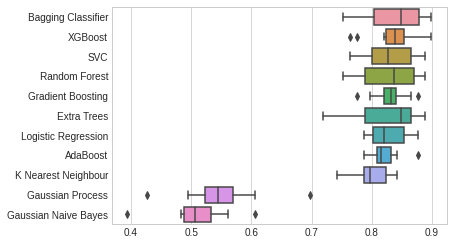

In [ ]:
result_df = result_df.drop(['mean'],axis=1)
sns.boxplot(data=result_df.T,orient = 'h')

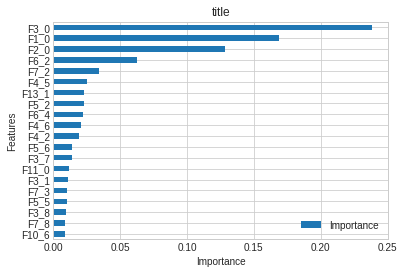

In [ ]:
def importance_plotting(data,xlabel,ylabel,title,n=20):
  ax = data.tail(n).plot(kind='barh')
  ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
  plt.show()


fi = {'Features': train.columns.tolist(),
      'Importance': xgb.feature_importances_}
importance = pd.DataFrame(fi,index=fi['Features']).sort_values(
    'Importance',ascending=True)
title = 'title'
importance_plotting(importance,'Importance','Features',title,20)




In [ ]:
gbc_imp = pd.DataFrame({'Feature':train.columns, 'gbc importance':gbc.feature_importances_})
xgb_imp = pd.DataFrame({'Feature':train.columns, 'xgb importance':xgb.feature_importances_})
ran_imp = pd.DataFrame({'Feature':train.columns, 'ran importance':ran.feature_importances_})
ext_imp = pd.DataFrame({'Feature':train.columns, 'ext importance':ext.feature_importances_})
ada_imp = pd.DataFrame({'Feature':train.columns, 'ada importance':ada.feature_importances_})

# 5가지 모델에 대한 항목 중요도 얻기
gbc_imp = pd.DataFrame({'Feature':train.columns, 'gbc importance':gbc.feature_importances_})
xgb_imp = pd.DataFrame({'Feature':train.columns, 'xgb importance':xgb.feature_importances_})
ran_imp = pd.DataFrame({'Feature':train.columns, 'ran importance':ran.feature_importances_})
ext_imp = pd.DataFrame({'Feature':train.columns, 'ext importance':ext.feature_importances_})
ada_imp = pd.DataFrame({'Feature':train.columns, 'ada importance':ada.feature_importances_})

# 이를 하나의 데이터프레임으로
importances = gbc_imp.merge(xgb_imp, on='Feature').merge(ran_imp, on='Feature').merge(ext_imp, on='Feature').merge(ada_imp, on='Feature')

importances['Average'] = importances.mean(axis=1)

importances = importances.sort_values(by='Average',
                                      ascending=False).reset_index(drop=True)